# LangChain: Q&A over Documents

An example might be a tool that would allow you to query a product catalog for items of interest.

In [ ]:
#pip install --upgrade langchain

In [ ]:
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

In [1]:
# account for deprecation of LLM model
import datetime
# Get the current date
current_date = datetime.datetime.now().date()

# Define the date after which the model should be set to "gpt-3.5-turbo"
target_date = datetime.date(2024, 6, 12)

# Set the model variable based on the current date
if current_date > target_date:
    llm_model = "gpt-3.5-turbo"
else:
    llm_model = "gpt-3.5-turbo-0301"

In [2]:
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import CSVLoader
from langchain.vectorstores import DocArrayInMemorySearch
from IPython.display import display, Markdown
from langchain.llms import OpenAI

In [3]:
import pandas as pd

file = 'OutdoorClothingCatalog_Export.csv'
loader = CSVLoader(file_path=file)

# Load the CSV file into a DataFrame
df = pd.read_csv(file)

# Print the DataFrame
print(df)

     Unnamed: 0                                               name  \
0             0                           Women's Campside Oxfords   
1             1           Recycled Waterhog Dog Mat, Chevron Weave   
2             2  Infant and Toddler Girls' Coastal Chill Swimsu...   
3             3         Refresh Swimwear, V-Neck Tankini Contrasts   
4             4                             EcoFlex 3L Storm Pants   
..          ...                                                ...   
995         995                 Men's  Classic Denim, Standard Fit   
996         996                  CozyPrint Sweater Fleece Pullover   
997         997         Women's NRS Endurance Spray Paddling Pants   
998         998                          Women's Stop Flies Hoodie   
999         999                                 Modern Utility Bag   

                                           description  
0    This ultracomfortable lace-to-toe Oxford boast...  
1    Protect your floors from spills and spla

In [4]:
from langchain.indexes import VectorstoreIndexCreator

In [6]:
index = VectorstoreIndexCreator(
    vectorstore_cls=DocArrayInMemorySearch
).from_loaders([loader])

C:\Users\zheng\AppData\Roaming\Python\Python312\site-packages\pydantic\_migration.py:283: UserWarning: `pydantic.error_wrappers:ValidationError` has been moved to `pydantic:ValidationError`.
  warnings.warn(f'`{import_path}` has been moved to `{new_location}`.')


In [7]:
query ="Please list all your shirts with sun protection \
in a table in markdown and summarize each one."

In [8]:
llm_replacement_model = OpenAI(temperature=0, 
                               model='gpt-3.5-turbo-instruct')

response = index.query(query, 
                       llm = llm_replacement_model)

c:\Users\zheng\anaconda3\envs\lightnovelscraper\Lib\site-packages\langchain_core\_api\deprecation.py:119: LangChainDeprecationWarning: The class `OpenAI` was deprecated in LangChain 0.0.10 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAI`.
  warn_deprecated(


In [9]:
display(Markdown(response))



| Unnamed: 0 | Name | Description |
| --- | --- | --- |
| 618 | Men's Tropical Plaid Short-Sleeve Shirt | Rated UPF 50+ for superior sun protection, made of 100% polyester, wrinkle-resistant, with front and back cape venting and two front bellows pockets. |
| 374 | Men's Plaid Tropic Shirt, Short-Sleeve | Rated UPF 50+ for sun protection, originally designed for fishing, made of 52% polyester and 48% nylon, machine washable and dryable, with front and back cape venting and two front bellows pockets. |
| 255 | Sun Shield Shirt by | Rated UPF 50+ for sun protection, made of 78% nylon and 22% Lycra Xtra Life fiber, handwash and line dry, wicks moisture for quick-drying comfort, fits comfortably over swimsuit, abrasion resistant, recommended by The Skin Cancer Foundation. |
| 535 | Men's TropicVibe Shirt, Short-Sleeve | Built-in UPF 50+ sun protection, lightweight feel, made of 71% nylon and 29% polyester, machine wash and dry, wr

## Step by Step

In [10]:
from langchain.document_loaders import CSVLoader
loader = CSVLoader(file_path=file)

In [11]:
docs = loader.load()

In [12]:
docs[0]

Document(page_content="Unnamed: 0: 0\nname: Women's Campside Oxfords\ndescription: This ultracomfortable lace-to-toe Oxford boasts a super-soft canvas, thick cushioning, and quality construction for a broken-in feel from the first time you put them on. \n\nSize & Fit: Order regular shoe size. For half sizes not offered, order up to next whole size. \n\nSpecs: Approx. weight: 1 lb.1 oz. per pair. \n\nConstruction: Soft canvas material for a broken-in feel and look. Comfortable EVA innersole with Cleansport NXT® antimicrobial odor control. Vintage hunt, fish and camping motif on innersole. Moderate arch contour of innersole. EVA foam midsole for cushioning and support. Chain-tread-inspired molded rubber outsole with modified chain-tread pattern. Imported. \n\nQuestions? Please contact us for any inquiries.", metadata={'source': 'OutdoorClothingCatalog_Export.csv', 'row': 0})

In [13]:
from langchain.embeddings import OpenAIEmbeddings
embeddings = OpenAIEmbeddings()

In [14]:
embed = embeddings.embed_query("Hi my name is Harrison")

In [15]:
print(len(embed))

1536


In [16]:
print(embed[:5])

[-0.021935116222567927, 0.0067511968393128025, -0.018258349739335232, -0.03915192509902946, -0.013979244800643546]


In [17]:
db = DocArrayInMemorySearch.from_documents(
    docs, 
    embeddings
)

In [18]:
query = "Please suggest a shirt with sunblocking"

In [19]:
docs = db.similarity_search(query)

In [20]:
len(docs)

4

In [21]:
docs[0]

Document(page_content='Unnamed: 0: 255\nname: Sun Shield Shirt by\ndescription: "Block the sun, not the fun – our high-performance sun shirt is guaranteed to protect from harmful UV rays. \n\nSize & Fit: Slightly Fitted: Softly shapes the body. Falls at hip.\n\nFabric & Care: 78% nylon, 22% Lycra Xtra Life fiber. UPF 50+ rated – the highest rated sun protection possible. Handwash, line dry.\n\nAdditional Features: Wicks moisture for quick-drying comfort. Fits comfortably over your favorite swimsuit. Abrasion resistant for season after season of wear. Imported.\n\nSun Protection That Won\'t Wear Off\nOur high-performance fabric provides SPF 50+ sun protection, blocking 98% of the sun\'s harmful rays. This fabric is recommended by The Skin Cancer Foundation as an effective UV protectant.', metadata={'source': 'OutdoorClothingCatalog_Export.csv', 'row': 255})

In [22]:
retriever = db.as_retriever()

In [23]:
llm = ChatOpenAI(temperature = 0.0, model=llm_model)

c:\Users\zheng\anaconda3\envs\lightnovelscraper\Lib\site-packages\langchain_core\_api\deprecation.py:119: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


In [24]:
qdocs = "".join([docs[i].page_content for i in range(len(docs))])


In [25]:
response = llm.call_as_llm(f"{qdocs} Question: Please list all your \
shirts with sun protection in a table in markdown and summarize each one.") 


c:\Users\zheng\anaconda3\envs\lightnovelscraper\Lib\site-packages\langchain_core\_api\deprecation.py:119: LangChainDeprecationWarning: The method `BaseChatModel.call_as_llm` was deprecated in langchain-core 0.1.7 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


In [26]:
display(Markdown(response))

| Name | Description |
| --- | --- |
| Sun Shield Shirt | High-performance sun shirt with UPF 50+ rating for maximum sun protection. Made of 78% nylon and 22% Lycra Xtra Life fiber. Moisture-wicking and abrasion-resistant. Fits comfortably over swimsuits. |
| Men's Plaid Tropic Shirt | Ultracomfortable shirt with UPF 50+ rating for sun protection. Made of 52% polyester and 48% nylon. Wrinkle-free and quick-drying. Features front and back cape venting and two front bellows pockets. |
| Men's TropicVibe Shirt | Lightweight sun-protection shirt with built-in UPF 50+ rating. Made of 71% nylon and 29% polyester. Wrinkle-resistant with front and back cape venting and two front bellows pockets. |
| Men's Tropical Plaid Short-Sleeve Shirt | Lightest hot-weather shirt with UPF 50+ rating for superior sun protection. Made of 100% polyester and wrinkle-resistant. Features front and back cape venting and two front bellows pockets. |

Each shirt provides UPF 50+ sun protection, blocking 98% of the sun's harmful rays. They are made of high-performance fabrics that are moisture-wicking, abrasion-resistant, and wrinkle-free. The shirts also feature front and back cape venting and two front bellows pockets for added comfort and convenience.

In [27]:
qa_stuff = RetrievalQA.from_chain_type(
    llm=llm, 
    chain_type="stuff", 
    retriever=retriever, 
    verbose=True
)

In [28]:
query =  "Please list all your shirts with sun protection in a table \
in markdown and summarize each one."

In [29]:
response = qa_stuff.run(query)

c:\Users\zheng\anaconda3\envs\lightnovelscraper\Lib\site-packages\langchain_core\_api\deprecation.py:119: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(




> Entering new RetrievalQA chain...

> Finished chain.


In [30]:
display(Markdown(response))

| Name | Description |
| --- | --- |
| Men's Tropical Plaid Short-Sleeve Shirt | Rated UPF 50+ for superior protection from the sun's UV rays. Made of 100% polyester and is wrinkle-resistant. With front and back cape venting that lets in cool breezes and two front bellows pockets. Provides the highest rated sun protection possible. |
| Men's Plaid Tropic Shirt, Short-Sleeve | Rated to UPF 50+, helping you stay cool and dry. Made with 52% polyester and 48% nylon, this shirt is machine washable and dryable. Additional features include front and back cape venting, two front bellows pockets and an imported design. With UPF 50+ coverage, you can limit sun exposure and feel secure with the highest rated sun protection available. |
| Sun Shield Shirt by | High-performance sun shirt is guaranteed to protect from harmful UV rays. Made of 78% nylon, 22% Lycra Xtra Life fiber. UPF 50+ rated – the highest rated sun protection possible. Wicks moisture for quick-drying comfort. Fits comfortably over your favorite swimsuit. Abrasion resistant for season after season of wear. |
| Men's TropicVibe Shirt, Short-Sleeve | Men’s sun-protection shirt with built-in UPF 50+. Made of Shell: 71% Nylon, 29% Polyester. Lining: 100% Polyester knit mesh. Machine wash and dry. Additional features include wrinkle resistance, front and back cape venting, and two front bellows pockets. Provides the highest rated sun protection possible. |

All of the listed shirts provide UPF 50+ sun protection, blocking 98% of the sun's harmful rays. The Men's Tropical Plaid Short-Sleeve Shirt and Men's Plaid Tropic Shirt, Short-Sleeve are both made of wrinkle-resistant fabric and have front and back cape venting and two front bellows pockets. The Sun Shield Shirt by is made of nylon and Lycra Xtra Life fiber and is abrasion-resistant. The Men's TropicVibe Shirt, Short-Sleeve is made of nylon and polyester and is wrinkle-resistant.

In [31]:
response = index.query(query, llm=llm)

In [32]:
index = VectorstoreIndexCreator(
    vectorstore_cls=DocArrayInMemorySearch,
    embedding=embeddings,
).from_loaders([loader])

## 3 Additional Methods
- Map_reduce
- Refine
- Map_rerank
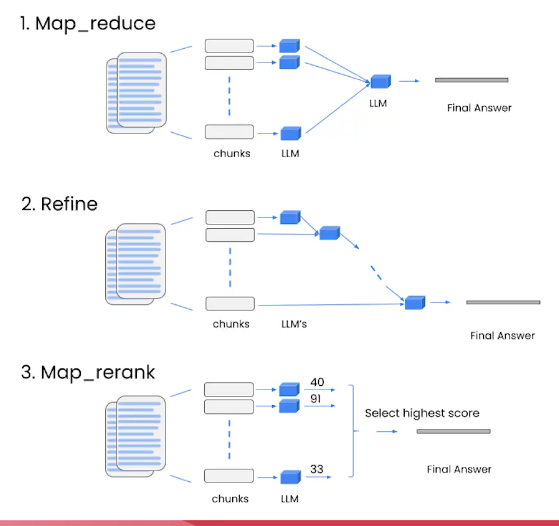